# Final Project: Does a Higher Population Lead to Higher Emissions

## Variables
- GDP - Countries GDP at purchasing power parities, measured (Billion 2015\\$ PPP)
- Population - Population of specific Country, measured (Mperson)
- CO2_emission - The amount of C02 emitted, measured (MMtonnes CO2)
- Energy_consumption - Amount of Consumption for the specific energy source, measured (quad Btu)
- Energy_production - Amount of Production for the specific energy source, measured (quad Btu)

In [88]:
import pandas as pd
import scipy
from matplotlib import pyplot  as plt
import numpy as np
import empiricaldist as ed
import math
from scipy.stats import pareto
from thinkstats2 import HypothesisTest
from numpy.random import default_rng
import thinkstats2
import thinkplot
import statsmodels.formula.api as smf

In [3]:
# places emissions into data frameji
emissions_df = pd.read_csv(r"energy.csv" )

In [4]:
# view data frame
emissions_df

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


## Histograms

In [5]:
# filter out total world stats
countries_em = emissions_df[~(emissions_df["Country"] == "World")]
# choose Year 2020 & each country only once
emissions20 = countries_em[(countries_em["Year"]==2019) & (countries_em["Energy_type"]=="all_energy_types")]
emissions20 = pd.DataFrame.reset_index(emissions20)
emissions20

,index,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,54060,54060,Afghanistan,all_energy_types,2019,0.122748,0.055210,79.4546,38050.900,3.225901,1.544888,9.391163
1,54066,54066,Albania,all_energy_types,2019,0.110748,0.089082,38.2684,2879.920,38.455319,2.893987,4.031302
2,54072,54072,Algeria,all_energy_types,2019,2.643503,6.429790,509.0660,43030.400,61.433374,5.192849,145.987969
3,54078,54078,American Samoa,all_energy_types,2019,0.004912,0.000000,NaN,55.312,88.796444,0.000000,0.355428
4,54084,54084,Angola,all_energy_types,2019,0.372428,3.510208,193.8260,31849.800,11.693253,1.921454,17.644577
...,...,...,...,...,...,...,...,...,...,...,...,...
225,55410,55410,Wake Island,all_energy_types,2019,0.019436,0.000000,NaN,NaN,0.000000,0.000000,1.273787
226,55416,55416,Western Sahara,all_energy_types,2019,0.003712,0.000000,NaN,NaN,0.000000,0.000000,0.263038
227,55422,55422,Yemen,all_energy_types,2019,0.159020,0.133273,53.0838,29162.200,5.452938,2.995635,8.292505
228,55428,55428,Zambia,all_energy_types,2019,0.207097,0.148004,247.1819,17873.850,11.586567,0.837831,7.096290


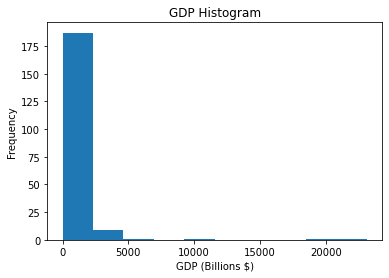

In [6]:
# histogram of GDP
gdp = emissions20["GDP"][~np.isnan(emissions20["GDP"])]
plt.hist(gdp)
plt.title("GDP Histogram")
plt.xlabel("GDP (Billions $)")
plt.ylabel("Frequency")
plt.show()

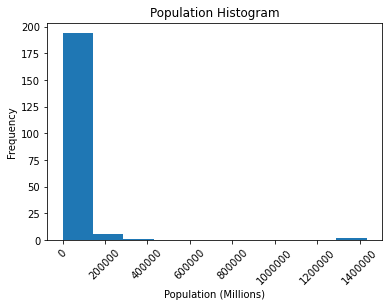

In [7]:
# Population histogram
pop = emissions20["Population"][~np.isnan(emissions20["Population"])]
plt.hist(pop)
plt.title("Population Histogram")
plt.xlabel("Population (Millions)")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.show()

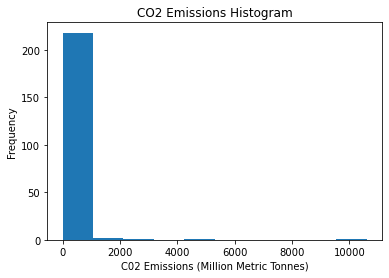

In [8]:
# emissions histogram
co2 = emissions20["CO2_emission"][~np.isnan(emissions20["CO2_emission"])]
plt.hist(co2, bins = 10)
plt.title("CO2 Emissions Histogram")
plt.xlabel("C02 Emissions (Million Metric Tonnes)")
plt.ylabel("Frequency")
plt.show()

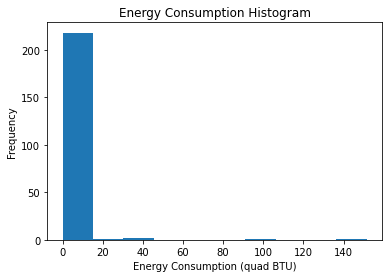

In [9]:
# energy consumption histogram
energy_cons = emissions20["Energy_consumption"][~np.isnan(emissions20["Energy_consumption"])]
plt.hist(energy_cons, bins = 10)
plt.title("Energy Consumption Histogram")
plt.xlabel("Energy Consumption (quad BTU)")
plt.ylabel("Frequency")
plt.show()

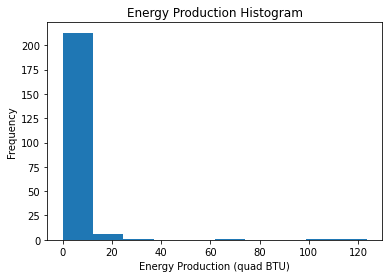

In [10]:
# energy production histogram
energy_prod = emissions20["Energy_production"][~np.isnan(emissions20["Energy_production"])]
plt.hist(energy_prod, bins = 10)
plt.title("Energy Production Histogram")
plt.xlabel("Energy Production (quad BTU)")
plt.ylabel("Frequency")
plt.show()

There are huge inequalities between countries when it comes to population, GDP, energy consumptions, and co2 emissions. None are normally distributed. 

## Other Descriptive Characteristics

In [11]:
# sort variables in descending order in order to view tails properly
pop_sorted = emissions20.sort_values(by=["Population"], ascending=False).reset_index(drop=True)
co2_sorted = emissions20.sort_values(by=["CO2_emission"], ascending=False).reset_index(drop=True)
gdp_sorted = emissions20.sort_values(by=["GDP"], ascending=False).reset_index(drop=True)
cons_sorted = emissions20.sort_values(by=["Energy_production"], ascending=False).reset_index(drop=True)
prod_sorted = emissions20.sort_values(by=["Energy_consumption"], ascending=False).reset_index(drop=True)


In [12]:
# mean, spread, tails of GDP
print(f"GDP\nMean: {gdp.mean()}\nSpread: {gdp.var()}\nTails:\n{gdp_sorted.GDP.dropna().tail()}{gdp_sorted.GDP.dropna().head()}")

GDP
Mean: 638.4512352949998
Spread: 5468357.318554283
Tails:
195    1.063890
196    0.802973
197    0.761102
198    0.574064
199    0.234263
Name: GDP, dtype: float640    23128.34
1    19925.43
2     9310.29
3     5359.05
4     4182.05
Name: GDP, dtype: float64


In [13]:
# mean, spread, tails of Population
print(f"Population\nMean: {pop.mean()}\nSpread: {pop.var()}\nTails:\n{pop_sorted.Population.dropna().tail()}{pop_sorted.Population.dropna().head()}")

Population
Mean: 38003.108688817716
Spread: 20696274720.739307
Tails:
198    57.2160
199    56.6932
200    55.3120
201    52.7944
202    30.0137
Name: Population, dtype: float640    1434512.0
1    1368140.0
2     330043.8
3     270984.0
4     216564.0
Name: Population, dtype: float64


In [14]:
# mean, spread, tails of Co2
print(f"CO2 Emissions\nMean: {co2.mean()}\nSpread: {co2.var()}\nTails:\n{co2_sorted.CO2_emission.dropna().tail()}{co2_sorted.CO2_emission.dropna().head()}")

CO2 Emissions
Mean: 159.57369281477574
Spread: 673858.0891964487
Tails:
218    0.009821
219    0.007518
220    0.000000
221    0.000000
222    0.000000
Name: CO2_emission, dtype: float640    10608.600386
1     5277.192754
2     2308.332020
3     1798.242239
4     1140.949688
Name: CO2_emission, dtype: float64


In [15]:
# mean, spread, tails of energy consumption
print(f"Energy Consumption\nMean: {energy_cons.mean()}\nSpread: {energy_cons.var()}\nTails:\n{cons_sorted.Energy_consumption.dropna().tail()}{cons_sorted.Energy_consumption.dropna().head()}")

Energy Consumption
Mean: 2.6952488338739244
Spread: 160.75077129753026
Tails:
218    0.000000
219    0.003359
220    0.191503
221    0.002387
222    0.004243
Name: Energy_consumption, dtype: float640    151.608886
1    100.434068
2     33.246533
3     10.161015
4     14.977905
Name: Energy_consumption, dtype: float64


In [16]:
# mean, spread, tails of energy production
print(f"Energy Production\nMean: {energy_prod.mean()}\nSpread: {energy_prod.var()}\nTails:\n{prod_sorted.Energy_production.dropna().tail()}{prod_sorted.Energy_production.dropna().head()}")

Energy Production
Mean: 2.7421926845185047
Spread: 142.73142468667712
Tails:
218    0.0
219    0.0
220    0.0
221    0.0
222    0.0
Name: Energy_production, dtype: float640    123.591360
1    101.400918
2     64.277996
3     17.785372
4      2.770441
Name: Energy_production, dtype: float64


## PMF's

In [17]:
def group_emissions(series):
    """Groups emissions into groups of 10,000 in order to aid visualization
    of probability mass function"""
    temp = []
    for val in series:
        if(val > 10000):
            temp.append(11000)
        elif(val > 9000):
            temp.append(10000)
        elif(val > 8000):
            temp.append(9000)
        elif(val > 7000):
            temp.append(8000)
        elif(val > 6000):
            temp.append(7000)
        elif(val > 5000):
            temp.append(6000)
        elif(val > 4000):
            temp.append(5000)
        elif(val > 3000):
            temp.append(4000)
        elif(val > 2000):
            temp.append(3000)
        elif(val> 1000):
            temp.append(2000)
        else:
            temp.append(1000)
    groups = pd.Series(temp)
    return groups

In [18]:
# comparing co2 emissions of most populous countries vs all others
pop_high = pop_sorted[0:10]
pop_other = pop_sorted.drop(pop_sorted.index[0:10]).reset_index(drop=True)

In [19]:
# calculates pmf of CO2 emission filtered by 10 most populous countries vs others
pop_high_em = group_emissions(pop_high["CO2_emission"])
pop_other_em = group_emissions(pop_other.CO2_emission)
pop_other_pmf = ed.Pmf.from_seq(pop_other_em)
pop_high_pmf = ed.Pmf.from_seq(pop_high_em)

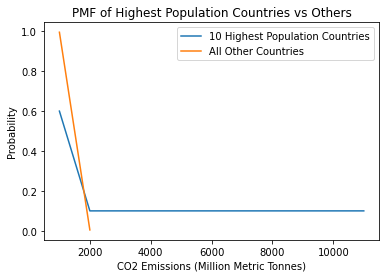

In [82]:
# histogram of 2 pmfs
pop_high_pmf.plot(label="10 Most Populous Countries")
pop_other_pmf.plot(label="All Other Countries")
plt.xlabel("CO2 Emissions (Million Metric Tonnes)")
plt.ylabel("Probability")
plt.legend(loc="upper right")
plt.title("PMF of Most Populous Countries vs Others")
plt.show()

## CDF

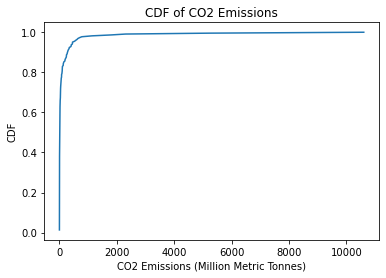

In [21]:
# cdf of co2 emissions
emissions_cdf = ed.Cdf.from_seq(emissions20.CO2_emission.dropna())
emissions_cdf.plot()
plt.xlabel("CO2 Emissions (Million Metric Tonnes)")
plt.ylabel("CDF")
plt.title("CDF of CO2 Emissions")
plt.show()

From the Cdf above, you can more easily tell that 99% of countries' emissions are below 2500 mmt yearly. Given that we are investigating the highest emitters of CO2, it may be helpful moving forward to focus on that top 1% of emitters and look at correlations between their population. Otherwise as can be seen in most of the preceding analysis, our visualizations will be hard to interpret. 

## Pareto Distribution

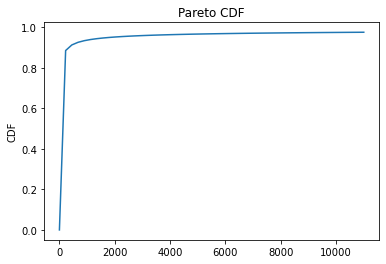

In [69]:
# plot pareto distribution
xmin = 1
alpha = .4
fig, ax = plt.subplots(1, 1)
samples = np.linspace(start=xmin, stop=11000, num=50)
output = np.array([pareto.cdf(x=samples, b=alpha, scale=xmin)])
plt.plot(samples, output.T, label='alpha {0}' .format(alpha))
plt.ylabel("CDF")
plt.title("Pareto CDF")
plt.show()

## Scatterplots & Correlation Analysis

Text(0, 0.5, 'Population (Millions)')

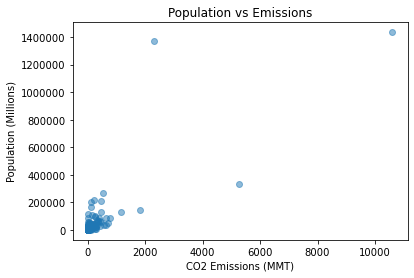

In [102]:
# scatterplot of emissions vs pop 
plt.scatter(emissions20.CO2_emission, emissions20.Population, alpha=.5)
plt.title("Population vs Emissions")
plt.ticklabel_format(style='plain')
plt.xlabel("CO2 Emissions (MMT)")
plt.ylabel("Population (Millions)")

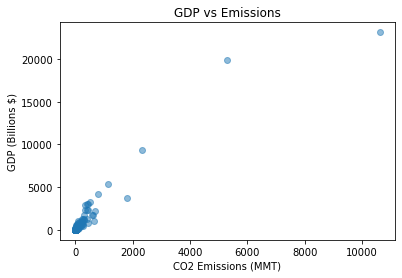

In [103]:
# scatterplot of emissions vs GDP
plt.scatter(emissions20.CO2_emission, emissions20.GDP, alpha = .5)
plt.title("GDP vs Emissions")
plt.xlabel("CO2 Emissions (MMT)")
plt.ylabel("GDP (Billions $)")
plt.show()

The relationship in both these scatterplots is linear, so pearson's correlation should be sufficient.

In [24]:
# covariance b/w emissions and population
emissions20.CO2_emission.cov(emissions20.Population)

99489804.41530359

In [25]:
# pearson's (it's a linear relationship) correlation b/w emissions and population
emissions20.CO2_emission.corr(emissions20.Population)

0.8050974923318549

In [26]:
# covariance b/w emissions and gdp
emissions20.CO2_emission.cov(emissions20.GDP)

1927049.7113552284

In [27]:
# correlation b/w emissions and gdp
emissions20.CO2_emission.corr(emissions20.GDP)

0.9525030151594196

In [28]:
# covariance b/w gdp and pop
emissions20.Population.cov(emissions20.GDP)

269790906.7244527

In [29]:
# correlation b/w gdp and pop
emissions20.Population.corr(emissions20.GDP)

0.7963996293431072

In [72]:
# correlation b/w energy production and emissions
emissions20.Energy_production.corr(emissions20.CO2_emission)

0.9219531974701016

In [74]:
# correlation b/w energy consumption and emissions
emissions20.Energy_consumption.corr(emissions20.CO2_emission)

0.990763007057575

In [75]:
# correlation b/w energy consumption and population
emissions20.Energy_consumption.corr(emissions20.Population)

0.7672195929151452

In [76]:
# correlation b/w energy production and population
emissions20.Energy_production.corr(emissions20.Population)

0.6624447507271003

In [106]:
choice_df = emissions20[["CO2_emission", "GDP", "Energy_production", "Energy_consumption", "Population"]]
choice_df.corr()

,CO2_emission,GDP,Energy_production,Energy_consumption,Population
CO2_emission,1.000000,0.952503,0.921953,0.990763,0.805097
GDP,0.952503,1.000000,0.903912,0.973270,0.796400
Energy_production,0.921953,0.903912,1.000000,0.948956,0.662445
Energy_consumption,0.990763,0.973270,0.948956,1.000000,0.767220
Population,0.805097,0.796400,0.662445,0.767220,1.000000


In [107]:
choice_df.cov()

,CO2_emission,GDP,Energy_production,Energy_consumption,Population
CO2_emission,6.738581e+05,1.927050e+06,9.041758e+03,1.031171e+04,9.948980e+07
GDP,1.927050e+06,5.468357e+06,2.659129e+04,3.039943e+04,2.697909e+08
Energy_production,9.041758e+03,2.659129e+04,1.427314e+02,1.437416e+02,1.190479e+06
Energy_consumption,1.031171e+04,3.039943e+04,1.437416e+02,1.607508e+02,1.463802e+06
Population,9.948980e+07,2.697909e+08,1.190479e+06,1.463802e+06,2.069627e+10


The above analysis shows a positive correlation b/w emissions and populations. However, this does not therefore mean that a higher population is the cause of higher emissions. It merely tells us that there is a positive relationship such that when there is a higher population there are higher emissions. It is possible there is a third variable that influences bother emissions and population that is the true driver of change. For instance, GDP has an incredibly high correlation of .95 with emissions. 

In order to show causation, we will need to do further testing.

## Hypothesis Testing

In [51]:
class CorrelationPermute(HypothesisTest):
    def TestStatistic(self, data):
        """Correlation Test Statistic"""
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    def RunModel(self):
        """Runs test"""
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [54]:
# correlation hypothesis test using permutated data to find pvalue
data = emissions20.CO2_emission, emissions20.Population
ht = CorrelationPermute(data)
pvalue = ht.PValue()

In [57]:
pvalue

0.0

float

The Pvalue is 0 meaning the effect is unlikely to occur by chance. 

## Regression

In [61]:
# regression analysis
# predictor: population, outcome: CO2 Emissions
formula = 'CO2_emission ~ Population'
model = smf.ols(formula, data = emissions20)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     370.3
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.77e-47
Time:                        21:48:36   Log-Likelihood:                -1552.9
No. Observations:                 203   AIC:                             3110.
Df Residuals:                     201   BIC:                             3116.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5155     37.084     -0.203      0.840     -80.640      65.609
Population     0.0048      0.000     19.244      0.000       0.004       0.005
==============================================================================
Omnibus:                      114.681   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20795.117
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                      52.551   Cond. No.                     1.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# regression analysis: predictor: GDP, outcome: CO2 Emissions
formula2 = 'CO2_emission ~ GDP'
model2 = smf.ols(formula2, data = emissions20)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     1937.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):          3.41e-104
Time:                        22:11:48   Log-Likelihood:                -1398.1
No. Observations:                 200   AIC:                             2800.
Df Residuals:                     198   BIC:                             2807.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.2030     19.364     -2.438      0.016     -85.389      -9.017
GDP            0.3524      0.008     44.012      0.000       0.337       0.368
==============================================================================
Omnibus:                      170.315   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20107.534
Skew:                           2.358   Prob(JB):                         0.00
Kurtosis:                      51.894   Cond. No.                     2.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above regression analysis comparing the two as predictors shows that GDP has a much greater effect on C02 emissions than population does. Though this does not signal causation by any means, it does suggest that further research be done between understanding co2 emissions less as a per person impact and more as the product of economic production. 